In [1]:
# Import statements
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Models
from sklearn.linear_model import SGDClassifier # SGD model
# from sklearn.ensemble import RandomForestClassifier # Random Forest model
# from sklearn.neural_network import MLPClassifier # Neural network

In [1]:
# If the dataset is too sparse, try performance of these instead
# from sklearn.svm import LinearSVC, SVC
# from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Load models from files if desired
from pickle import load

with open("SGDClassifier_model.pkl", "rb") as file:
    clf = load(file)
with open("SGDClassifier_model_resampled.pkl", "rb") as file:
    clf_resampled = load(file)

In [2]:
# Reading into data frame from file
data_frame = pd.read_csv('./creditcard.csv')

In [9]:
clf, clf_resampled = None, None

In [4]:
# Dataset Validation
# Validation the dataset isn't malformed and list features
# data_frame.head()
# data_frame.columns

# Exploration
# data_frame.shape

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Data Preprocessing
# Check if data has null values (has none)
#print(data_frame.isnull().sum())
# Check if data has zero values (has some in Amount)
#print((data_frame["Class"] == 1).sum())
#print((data_frame["Class"] == 0).sum())

In [3]:
# Data to fit and targets
feature_set = ["Time", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "Amount"]\
# sub_set = ["Time", "V1", "V2", "V3", "V4", "Amount"]
target_set = ["Class"]

X = data_frame[feature_set]
y = data_frame[target_set]

# y.head()
# print(y)

In [4]:
# Splits data into 80-20 train-test
# Prevents data leakage (where training and test sets influence each other in scaling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

print((y_train["Class"] == 1).sum())
print((y_test["Class"] == 1).sum())

394
98


In [5]:
# Scaling with each method, preserving unscaled values for comparison
standard_scaler = StandardScaler()
# minmax_scaler = MinMaxScaler()

# # Standard scaling
# X_train_standard_scaled = standard_scaler.fit_transform(X_train)
# X_test_standard_scaled = standard_scaler.transform(X_test)
# # Minmax Scaling
# X_train_minmax_scaled = minmax_scaler.fit_transform(X_train)
# X_test_minmax_scaled = minmax_scaler.transform(X_test)

In [6]:
# Balancing data set with resampling

# Separate majority and minority classes in training set
X_train_majority = X_train[y_train["Class"] == 0]
y_train_majority = y_train[y_train["Class"] == 0]
X_train_minority = X_train[y_train["Class"] == 1]
y_train_minority = y_train[y_train["Class"] == 1]

# X_train_majority.head()

In [7]:

# Oversample minority class
X_minority_upsampled, y_minority_upsampled = resample(
    X_train_minority, y_train_minority,
    replace=True,                      # sample with replacement
    n_samples=len(y_train_majority),  # match majority class
    random_state=1
)


# Combine majority and upsampled minority
X_train_resampled = pd.concat((X_train_majority, X_minority_upsampled))
y_train_resampled = pd.concat((y_train_majority, y_minority_upsampled))

# X_train_resampled.head()
# y_train_resampled.head()
# print((y_train_resampled["Class"] == 0).sum())
# print((y_train_resampled["Class"] == 1).sum())
# print((y_train["Class"] == 1).sum())


In [10]:
# Initialize model(s)
if clf == None:
    clf = SGDClassifier(random_state=1) # Apparently prefers standard scaling
if clf_resampled == None:
    clf_resampled = SGDClassifier(random_state=1)
# RF_model = RandomForestClassifier(random_state=1) # Theoretically needs no scaling
# MLP_model = MLPClassifier(random_state=1)

# Collect predictions from non-resample trained model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Collect predictions from resample trained model
clf_resampled.fit(X_train_resampled, y_train_resampled)
y_resampled_pred = clf_resampled.predict(X_test)

/home/quetzl/.pyenv/versions/ml-project-2025/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/quetzl/.pyenv/versions/ml-project-2025/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.63      0.25        98

    accuracy                           0.99     56962
   macro avg       0.58      0.81      0.62     56962
weighted avg       1.00      0.99      1.00     56962



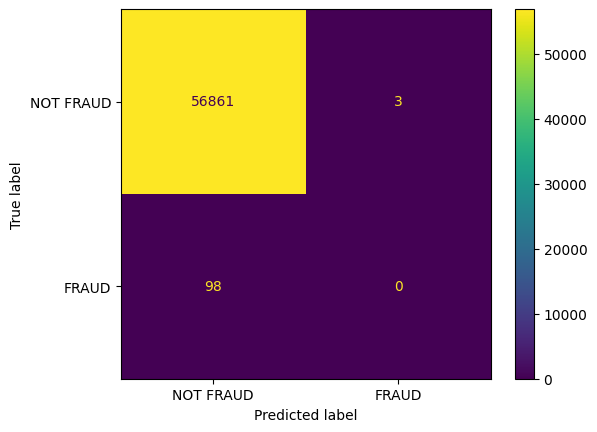

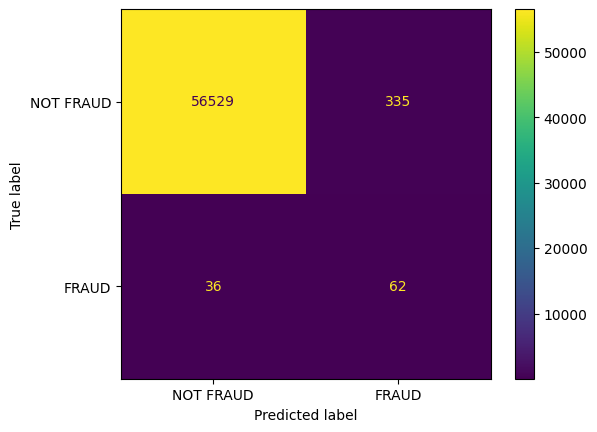

In [11]:
from sklearn import metrics
# Metrics for non-resampled model
print(metrics.classification_report(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(cm, display_labels=["NOT FRAUD", "FRAUD"]).plot()

# Metrics for resampled model
print(metrics.classification_report(y_test, y_resampled_pred))
cm_resampled = metrics.confusion_matrix(y_test, y_resampled_pred)
metrics.ConfusionMatrixDisplay(cm_resampled, display_labels=["NOT FRAUD", "FRAUD"]).plot()

In [12]:
# Cross validation score for not resampled
kf = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring="precision")
print("Cross validation scores:", cv_scores)
print(f"Mean Validation Score: {np.mean(cv_scores)}")

# Cross validation score for resampled
cv_scores_resampled = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=kf, scoring="precision")
print("Cross Resampled validation scores:", cv_scores_resampled)
print(f"Mean Resampled Validation Score: {np.mean(cv_scores_resampled)}")

/home/quetzl/.pyenv/versions/ml-project-2025/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/quetzl/.pyenv/versions/ml-project-2025/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/quetzl/.pyenv/versions/ml-project-2025/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/quetzl/.pyenv/versions/ml-project-2025/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: D

Cross validation scores: [0. 0. 0. 0. 0.]
Mean Validation Score: 0.0


/home/quetzl/.pyenv/versions/ml-project-2025/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/quetzl/.pyenv/versions/ml-project-2025/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/quetzl/.pyenv/versions/ml-project-2025/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/quetzl/.pyenv/versions/ml-project-2025/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: D

Cross Resampled validation scores: [0.98200292 0.50362572 0.94841353 0.94844404 0.99037179]
Mean Resampled Validation Score: 0.8745716002081021


<Figure size 800x600 with 0 Axes>

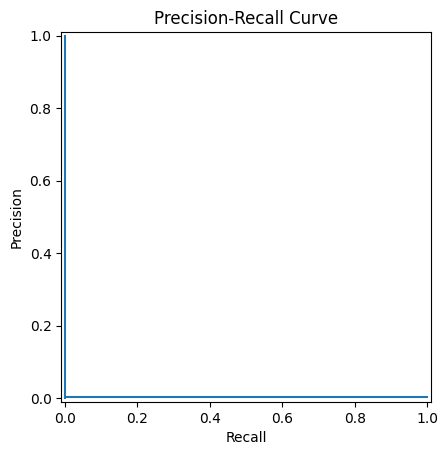

In [13]:
# Display AUPRC for non-resampled
import matplotlib.pyplot as plt

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(8,6))
display = metrics.PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot()

plt.title("Precision-Recall Curve")
plt.show()

<Figure size 800x600 with 0 Axes>

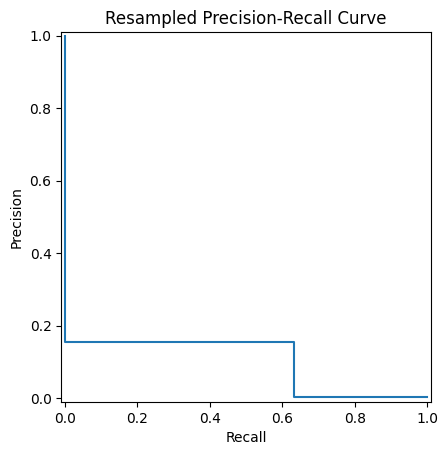

In [14]:
# Display AUPRC for resampled
import matplotlib.pyplot as plt

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_resampled_pred)
plt.figure(figsize=(8,6))
display = metrics.PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot()

plt.title("Resampled Precision-Recall Curve")
plt.show()

In [62]:
from pickle import dump
with open ("SGDClassifier_model_resampled.pkl", "wb") as file:
    dump(clf_resampled, file)
with open ("SGD_Classifier_model.pkl", "wb") as file:
    dump(clf, file)